# Patron Estructural: Adapter

## Situación actual

In [1]:
class RoundPeg:
  def __init__(self, radius: float) -> None:
    self.__radius = radius

  def get_radius(self) -> float:
    return self.__radius


class RoundHole:
  def __init__(self, radius: float) -> None:
    self.__radius = radius

  def get_radius(self) -> float:
    return self.__radius

  def fits(self, peg: RoundPeg) -> bool:
    return self.get_radius() >= peg.get_radius()

Nuestra aplicación funciona actualmente comprobando que las piezas redondas entren en los agûjeros

In [2]:
round_peg = RoundPeg(5)
hole = RoundHole(5)

# Verdadero
hole.fits(round_peg)

True

## Actualización

Tenemos una nueva clase con piezas cuadradas

In [3]:
class SquarePeg:
  def __init__(self, width: float) -> None:
    self.__width = width
  
  def get_width(self) -> float:
    return self.__width

In [4]:
small_square_peg = SquarePeg(5)
large_square_peg = SquarePeg(10)

# Verdadero
hole.fits(small_square_peg)

AttributeError: ignored

## Problema


Es posible meter piezas cuadradas en espacios redondos. Sin embargo, la clase "SquarePeg" no tiene una interfaz compatible.
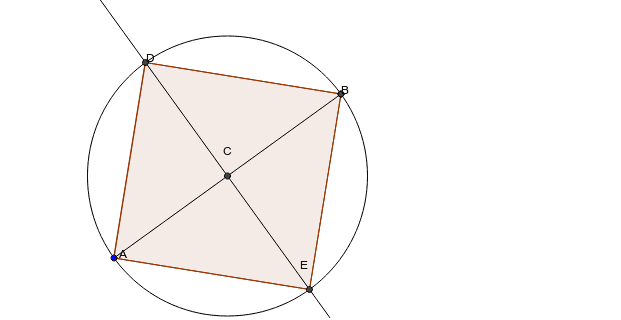

## Implementando el patron "Adapter"


Programa a una interfaz NO a una implementación.

In [ ]:
from abc import ABC, abstractmethod

class IRoundPeg(ABC):
  """ 
  ---------------------------------------------------------------------------
  Interfaz
  ---------------------------------------------------------------------------
  Incluye la firma de los métodos del objeto
  """
  @abstractmethod
  def get_radius(self) -> float:
    pass
  

In [ ]:
# Hacemos que nuestra clase RoundPeg implemente la interfaz IRoundPeg
class RoundPeg(IRoundPeg):
  def __init__(self, radius: float) -> None:
    self.__radius = radius

  def get_radius(self) -> float:
    return self.__radius


In [ ]:
class RoundHole:
  """ 
  ---------------------------------------------------------------------------
  Cliente
  ---------------------------------------------------------------------------
  Interactúa con los objetos respondiendo a la interfaz
  """
  def __init__(self, radius: float) -> None:
    self.__radius = radius

  def get_radius(self) -> float:
    return self.__radius

  # Nuestro método espera recibir como parámetro un objeto que implemente la
  #  interfaz "IRoundPeg"
  def fits(self, peg: IRoundPeg) -> bool:
    return self.get_radius() >= peg.get_radius()
  

In [ ]:
class SquarePeg:
  """ 
  ---------------------------------------------------------------------------
  Adaptado
  ---------------------------------------------------------------------------
  Objeto cuya interfaz ha sido adaptada para corresponder a la
   interfaz.
  """
  def __init__(self, width: float) -> None:
    self.__width = width
  
  def get_width(self) -> float:
    return self.__width

In [ ]:
import math


# Hacemos que nuestra clase SquarePegAdapter implemente la interfaz IRoundPeg
class SquarePegAdapter(IRoundPeg):
  """ 
  ---------------------------------------------------------------------------
  Adaptador
  ---------------------------------------------------------------------------
  Implementa los métodos de la interfaz y dentro llama a los métodos del objeto
  adaptado.
  """

  def __init__(self, peg: SquarePeg) -> None:
    self.__peg = peg

  def get_radius(self) -> float:
    return self.__peg.get_width() * math.sqrt(2) / 2

In [ ]:
small_square_peg_adapter = SquarePegAdapter(small_square_peg)
large_square_peg_adapter = SquarePegAdapter(large_square_peg)

print(hole.fits(small_square_peg_adapter)) # Verdadero
print(hole.fits(large_square_peg_adapter)) # Falso